In [44]:
import cv2
import matplotlib.pyplot as plt

from utils import *
from darknet import Darknet

# Download dos pesos: https://github.com/patrick013/Object-Detection---Yolov3/blob/master/model/yolov3.weights

In [45]:
# Defina o local e nome do arquivo de configuração (cfg)
arquivo_cfg = './cfg/yolov3.cfg'

# Defina o local e nome do arquivo de pesos pré-treinados
arquivo_pesos = './weights/yolov3.weights'

# Defina o local e nome do arquivo de classes de objetos COCO
arquivo_classes = 'data/coco.names'

# Carregue a arquitetura da rede
modelo = Darknet(arquivo_cfg)

# Carregue os pesos pré-treinados
modelo.load_weights(arquivo_pesos)

# Carregue as classes de objetos COCO
nomes_classes = load_class_names(arquivo_classes)

In [46]:
# Mostre em tela a rede neural utilizada no YOLOv3
modelo.print_network()

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32
    1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64
    2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32
    3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64
    4 shortcut 1
    5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128
    6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64
    7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128
    8 shortcut 5
    9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64
   10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128
   11 shortcut 8
   12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256
   13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128
   14 conv    256  3 x 3 / 1    52 x  52 x 128   ->    52 x  52 x 256
   15 shortcut 12
   16 conv    128  1 x 1

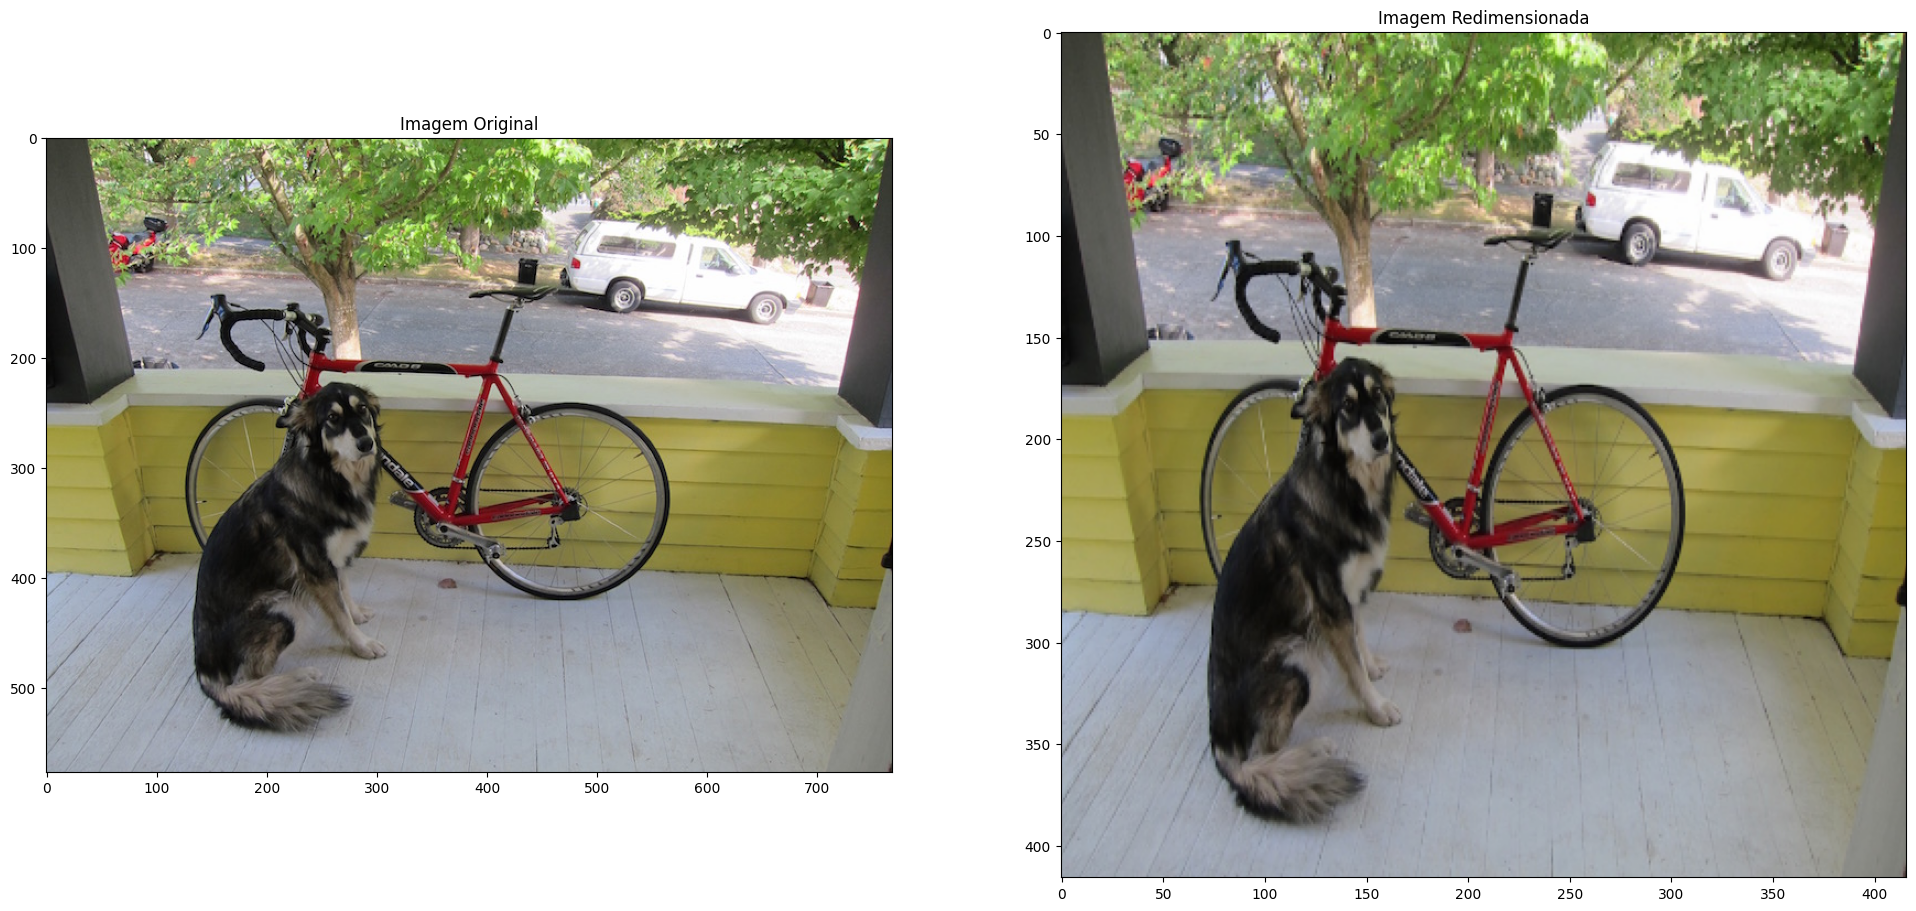

In [47]:
# Defina o tamanho padrão da figura
plt.rcParams['figure.figsize'] = [24.0, 14.0]

# Carregue a imagem
img = cv2.imread('./images/dog.jpg')

# Converta a imagem para o espaço de cores RGB
imagem_original = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Redimensione a imagem para a largura e altura de entrada da primeira camada da rede.
imagem_redimensionada = cv2.resize(imagem_original, (modelo.width, modelo.height))

# Exiba as imagens
plt.subplot(121)
plt.title('Imagem Original')
plt.imshow(imagem_original)
plt.subplot(122)
plt.title('Imagem Redimensionada')
plt.imshow(imagem_redimensionada)
plt.show()

In [48]:
# Defina o limiar de NMS (Non-Maximum Suppression)
limiar_nms = 0.6


In [49]:
# Defina o limiar de IOU (Intersection over Union)
limiar_iou = 0.4




It took 1.346 seconds to detect the objects in the image.

Number of Objects Detected: 28 

Objects Found and Confidence Level:

1. person: 0.999996
2. person: 1.000000
3. car: 0.707238
4. truck: 0.933031
5. car: 0.658085
6. truck: 0.666981
7. person: 1.000000
8. traffic light: 1.000000
9. person: 1.000000
10. car: 0.997369
11. bus: 0.998023
12. person: 1.000000
13. person: 1.000000
14. person: 1.000000
15. person: 1.000000
16. person: 1.000000
17. traffic light: 1.000000
18. traffic light: 1.000000
19. handbag: 0.997282
20. traffic light: 1.000000
21. car: 0.989741
22. traffic light: 1.000000
23. traffic light: 0.999999
24. person: 0.999999
25. truck: 0.715037
26. traffic light: 1.000000
27. person: 0.999993
28. person: 0.999996


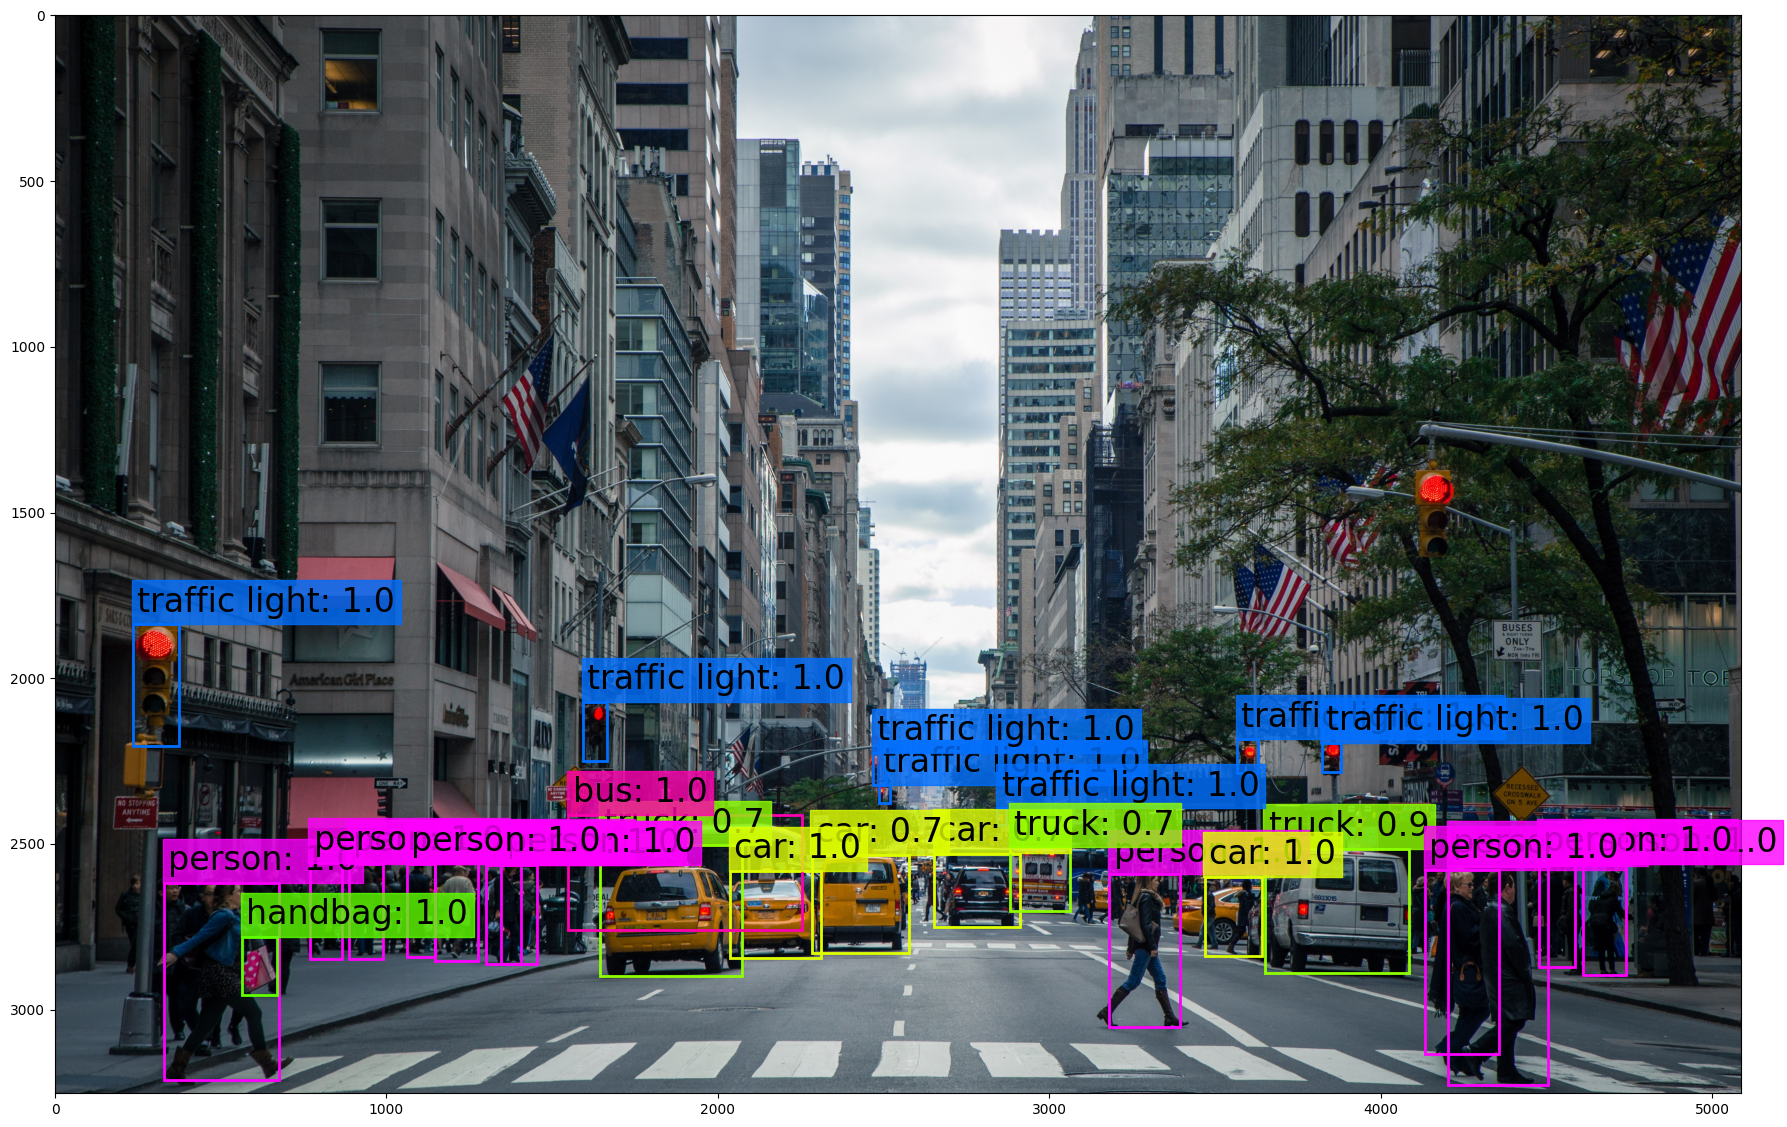

In [50]:
# Defina o tamanho padrão da figura
plt.rcParams['figure.figsize'] = [24.0, 14.0]

# Carregue a imagem
img = cv2.imread('./images/city_scene.jpg')

# Converta a imagem para o espaço de cores RGB
imagem_original = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Redimensione a imagem para a largura e altura de entrada da primeira camada da rede.
imagem_redimensionada = cv2.resize(imagem_original, (modelo.width, modelo.height))

# Defina o limiar de IOU (Intersection over Union). O valor padrão é 0.4
limiar_iou = 0.4

# Defina o limiar de NMS (Non-Maximum Suppression). O valor padrão é 0.6
limiar_nms = 0.6

# Detecte objetos na imagem
caixas = detect_objects(modelo, imagem_redimensionada, limiar_iou, limiar_nms)

# Imprima os objetos encontrados e o nível de confiança
print_objects(caixas, nomes_classes)

# Plote a imagem com caixas delimitadoras e rótulos de classe de objeto correspondentes
plot_boxes(imagem_original, caixas, nomes_classes, plot_labels=True)
